# 2.1. AdaLine

## 2.1.A. Generate and Plot Data

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [ ]:
np.random.seed(100)

In [ ]:
avg_x_1 = 0
sd_x_1 = 0.1
Class1_x = np.random.normal(avg_x_1, sd_x_1, 100)

avg_y_1 = 0
sd_y_1 = 0.4
Class1_y = np.random.normal(avg_y_1, sd_y_1, 100)

Class1_Data = list(zip(Class1_x,Class1_y))
Class1_Label = np.ones(100)
Class1 = list(zip(Class1_Data,Class1_Label))

In [ ]:
avg_x_2 = 1
sd_x_2 = 0.2
Class2_x = np.random.normal(avg_x_2, sd_x_2, 100)

avg_y_2 = 1
sd_y_2 = 0.2
Class2_y = np.random.normal(avg_y_2, sd_y_2, 100)

Class2_Data = list(zip(Class2_x,Class2_y))
Class2_Label = np.zeros(100) - np.ones(100)
Class2 = list(zip(Class2_Data,Class2_Label))

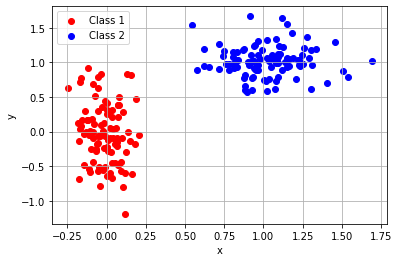

In [ ]:
plt.scatter(Class1_x, Class1_y, c ="red", linewidths = 1)
plt.scatter(Class2_x, Class2_y, c ="blue", linewidths = 1)

plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Class 1" , "Class 2"])
plt.grid(True)  # add grid
plt.savefig("Q21figure1.pdf")
plt.show()

## 2.1.B. AdaLine Implementation


In [ ]:
def PrepareData(Class1,Class2):
    random.seed(0)
    AllData = Class1 + Class2
    random.shuffle(AllData)
    df = pd.DataFrame (AllData, columns = ['datapoints','labels'])
    x = df['datapoints']
    y = df['labels']
    return x,y

In [ ]:
# Step 0 
# Initialize weights & bias (*sm for small random values)
def RandomInitialize(sm):
    np.random.seed(100)
    w = np.random.rand(1,2) * sm
    b = np.zeros(1)
    print(f"Initial w={w}, Initial b={b}")
    return w,b

def sgn(net):
    if net >= 0:
        return 1
    else:
        return -1

def tanh(net):
    return np.tanh(net)

# Step 3
# Compute yin = net = w.x + b
def Forward(w,x,b,actfunc):
    net = np.dot(w,x) + b
    if actfunc == 'sgn':
        h = sgn(net)
    elif actfunc == 'tanh':
        h = tanh(net)
    return h, net

# Step 4
# Update - sgn
def DeltaUpdate(w,b,x,t,net,alpha):
    t = t.reshape(1,)
    x = x.reshape((1,2))
    delta_w = alpha * np.dot((t - net), x)
    delta_b = alpha * (t - net)
    w = w + delta_w
    b = b + delta_b
    return w,b

# Step 4
# Update - tanh
def tanhUpdate(w,b,x,t,h,alpha,gamma):
    t = t.reshape(1,)
    x = x.reshape((1,2))
    diff_w = alpha * (1-h**2) * gamma * np.dot((t - h), x)
    diff_b = alpha * (1-h**2) * gamma * (t - h)
    w = w + diff_w
    b = b + diff_b
    return w,b

# Step 5
# Compute Cost Function - sgn
def sgnCost(t,net):
    error = 0.5 * np.power((t-net),2)
    return error

# Step 5
# Compute Cost Function - tanh
def tanhCost(t,gamma,net):
    error = 0.5 * np.power( t - gamma * np.tanh(net),2) 
    return error

def SeparationLine(start,end,w,b):
    x= np.linspace(start,end)
    y = -(w[0][0] * x + b)
    y = y / w[0][1]
    return x,y

In [ ]:
# Training Func
def Adaline(x,y,max_iter,learning_rate,actfunc,samples):
    cost_list = []
    eps = 0.00005 # End criteria
    sm = 0.01 # In order to make small weights
    gamma = 0.05  #Hyperparamter for tanh actfunc
    w,b = RandomInitialize(sm)          #Step 0 
    print("Hyperparams are: ",f"eps={eps}, max_iter={max_iter}, learning_rate={learning_rate}, actfunc={actfunc}, sm={sm}, gamma={gamma}")
    for i in range(max_iter):           #Step 1
        h, net = Forward(w,np.asarray(x[i%samples]),b,actfunc) #Step 3
        if actfunc == 'sgn':
            cost = sgnCost(np.asarray(y[i%samples]),net)
        elif actfunc == 'tanh':
            cost = tanhCost(np.asarray(y[i%samples]),net,gamma)
        #After an Epoch
        if i % samples == 0 and i!=0:   #Step5
            cost_list.append(cost)
            error = np.mean(cost_list)
            print('Epoch %d / %d - Error: %f' % (len(cost_list), int(max_iter/samples), error))
            print('w:', w)
            print('b:', b)
            if error <= eps:  
                return w,b, cost_list
        if actfunc == 'sgn':
            w,b = DeltaUpdate(w,b,np.asarray(x[i%samples]),np.asarray(y[i%samples]),net, learning_rate)
        elif actfunc == 'tanh':
            w,b
        w,b = tanhUpdate(w,b,np.asarray(x[i%samples]),np.asarray(y[i%samples]),h,learning_rate, gamma) #Step 4
    return w,b, cost_list                #Step 6


In [ ]:
x, y = PrepareData(Class1,Class2) # Prepare Dataset

In [ ]:
pd.DataFrame(x)

,datapoints
0,"(0.9517302500896031, 0.8830221335080104)"
1,"(1.5418003894731838, 0.7877064726156713)"
2,"(-0.0251879139213213, -0.5587997379813134)"
3,"(1.0739222301347469, 0.6137174286141904)"
4,"(1.229491487702798, 0.9559738872464016)"
...,...
195,"(0.06130388816875463, 0.052099382141080876)"
196,"(-0.04580269855026243, -0.5185567228600604)"
197,"(0.6529217705333853, 0.9327712743046086)"
198,"(1.0352740956310085, 1.01855528499347)"


In [ ]:
pd.DataFrame(y)

,labels
0,-1.0
1,-1.0
2,1.0
3,-1.0
4,-1.0
...,...
195,1.0
196,1.0
197,-1.0
198,-1.0


### Train and Plot Results

Initial w=[[0.00543405 0.00278369]], Initial b=[0.]
Hyperparams are:  eps=5e-05, max_iter=10000, learning_rate=0.01, actfunc=sgn, sm=0.01, gamma=0.05
Epoch 1 / 50 - Error: 0.074154
w: [[-0.53067324 -0.48364379]]
b: [0.31723481]
Epoch 2 / 50 - Error: 0.061351
w: [[-0.75486391 -0.61998622]]
b: [0.57748979]
Epoch 3 / 50 - Error: 0.053710
w: [[-0.89402962 -0.66138961]]
b: [0.71213017]
Epoch 4 / 50 - Error: 0.048498
w: [[-0.98914813 -0.66098208]]
b: [0.7814298]
Epoch 5 / 50 - Error: 0.044681
w: [[-1.05904528 -0.64265295]]
b: [0.81793943]
Epoch 6 / 50 - Error: 0.041745
w: [[-1.11344994 -0.61782613]]
b: [0.8379099]
Epoch 7 / 50 - Error: 0.039401
w: [[-1.15757653 -0.59184903]]
b: [0.8494358]
Epoch 8 / 50 - Error: 0.037476
w: [[-1.19435153 -0.56709992]]
b: [0.85656189]
Epoch 9 / 50 - Error: 0.035860
w: [[-1.22552239 -0.54452112]]
b: [0.86132124]
Epoch 10 / 50 - Error: 0.034477
w: [[-1.25221308 -0.52437433]]
b: [0.86474605]
Epoch 11 / 50 - Error: 0.033279
w: [[-1.27520466 -0.50661089]]
b: [0.867

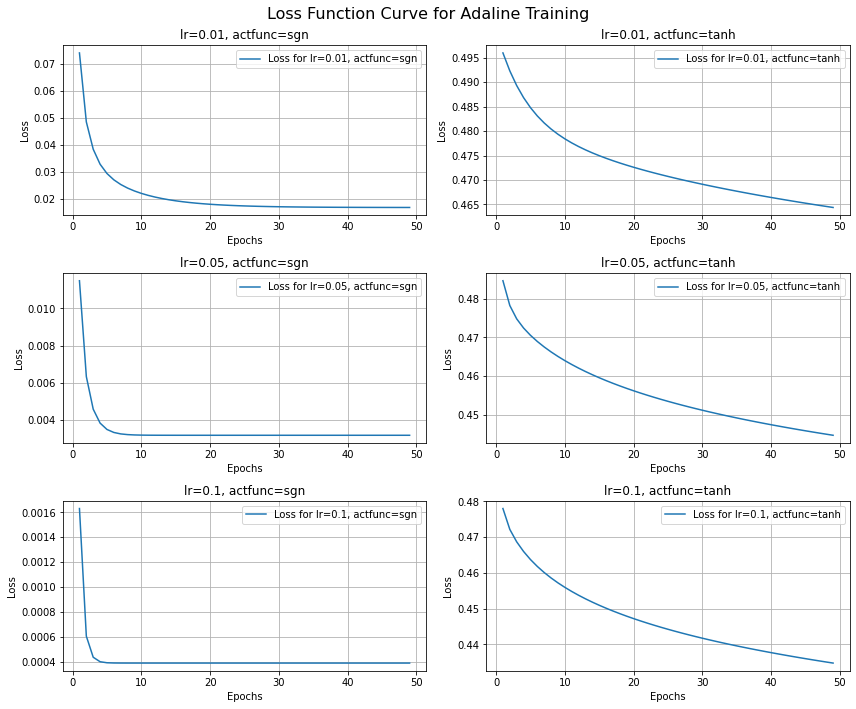

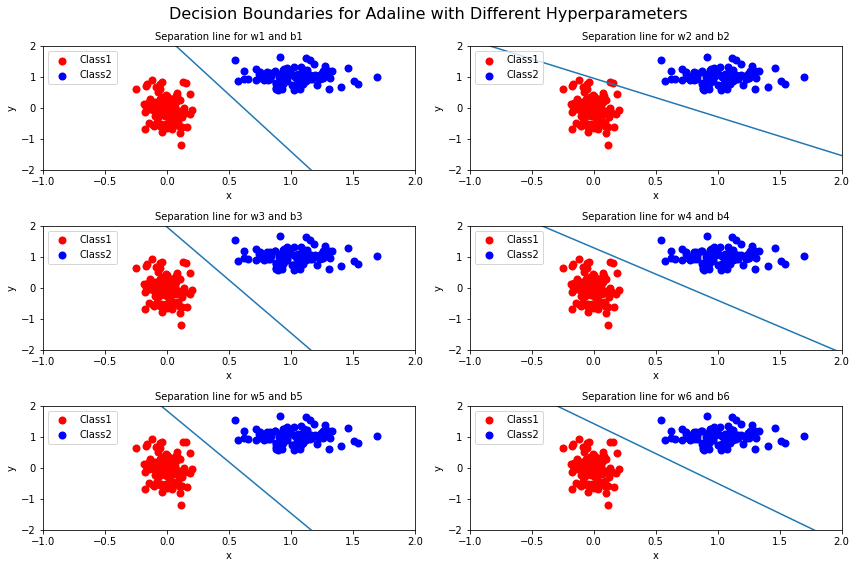

In [ ]:
# define hyperparameters
max_iter = 10000
learning_rates = [0.01, 0.05, 0.1]
actfuncs = ['sgn', 'tanh']

# create subplots
fig, axs = plt.subplots(len(learning_rates), len(actfuncs), figsize=(12, 10))

# set the figure title
fig.suptitle('Loss Function Curve for Adaline Training', fontsize=16)

# define empty lists for weights and biases
weights = []
biases = []

# iterate over hyperparameters and plot the error curves
for i, lr in enumerate(learning_rates):
    for j, actfunc in enumerate(actfuncs):
        w, b, error_lst = Adaline(x, y, max_iter=max_iter, learning_rate=lr, actfunc=actfunc, samples=200)
        itr = range(1, len(error_lst) + 1)
        axs[i, j].plot(itr, error_lst, label='Loss for ' f'lr={lr}, actfunc={actfunc}')

        # add axis labels
        axs[i, j].set_title(f'lr={lr}, actfunc={actfunc}', fontsize=12)
        axs[i, j].set_xlabel('Epochs')
        axs[i, j].set_ylabel('Loss')

        # add grid
        axs[i, j].grid(True)

        # adjust tick label font size
        axs[i, j].tick_params(axis='both', which='major', labelsize=10)

        # add legend
        axs[i, j].legend(loc='upper right')

        # save weights and biases
        weights.append(w)
        biases.append(b)

        # print weights and bias
        print(f'wi: {w}x + {b}')

# adjust subplot spacing
fig.tight_layout()

# save the figure
plt.savefig("Q22figure2.pdf")

# show the plot
plt.show()

# create subplots for decision boundaries
fig2, axs2 = plt.subplots(3, 2, figsize=(12, 8))

# set the figure title
fig2.suptitle('Decision Boundaries for Adaline with Different Hyperparameters', fontsize=16)


# plot the weight and bias separation lines

for i, (w, b) in enumerate(zip(weights, biases)):
    px1, px2 = SeparationLine(-3, 3, w, b)

    plt.subplot(3, 2, i + 1)
    plt.scatter(Class1_x, Class1_y, c="red", linewidths=2)
    plt.scatter(Class2_x, Class2_y, c="blue", linewidths=2)
    plt.plot(px1, px2)

    plt.xlim(-1, 2)
    plt.ylim(-2, 2)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(["Class1", "Class2"], loc='upper left')

    plt.title(f"Separation line for w{i+1} and b{i+1}", fontsize=10)

plt.tight_layout()
plt.savefig("Q22figure3.pdf")
plt.show()


## 2.1.C Other Data Generation and Plot

In [ ]:
np.random.seed(74)

In [ ]:
avg_x_1 = 0
sd_x_1 = 0.4
Class1_x = np.random.normal(avg_x_1, sd_x_1, 100)

avg_y_1 = 0
sd_y_1 = 0.4
Class1_y = np.random.normal(avg_y_1, sd_y_1, 100)

Class1_Data = list(zip(Class1_x,Class1_y))
Class1_Label = np.ones(100)
Class1 = list(zip(Class1_Data,Class1_Label))

In [ ]:
avg_x_2 = 1
sd_x_2 = 0.3
Class2_x = np.random.normal(avg_x_2, sd_x_2, 100)

avg_y_2 = 1
sd_y_2 = 0.3
Class2_y = np.random.normal(avg_y_2, sd_y_2, 100)

Class2_Data = list(zip(Class2_x,Class2_y))
Class2_Label = np.zeros(100) - np.ones(100)
Class2 = list(zip(Class2_Data,Class2_Label))

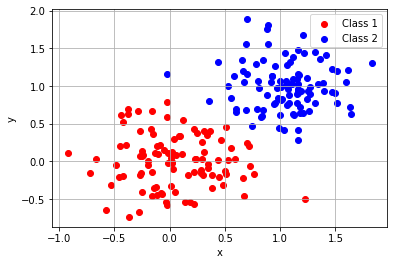

In [ ]:
plt.scatter(Class1_x, Class1_y, c ="red", linewidths = 1)
plt.scatter(Class2_x, Class2_y, c ="blue", linewidths = 1)

plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Class 1" , "Class 2"])
plt.grid(True)  # add grid
plt.savefig("Q23figure1.pdf")
plt.show()

In [ ]:
x, y = PrepareData(Class1,Class2) # Prepare Dataset

In [ ]:
pd.DataFrame(x)

,datapoints
0,"(1.157691329210764, 0.9300571953978778)"
1,"(0.9984231314220785, 1.0672882409873823)"
2,"(-0.15788165297309362, -0.45644769225917287)"
3,"(0.9924576614865703, 0.4381296738487238)"
4,"(1.2491640881260935, 0.9358621056863297)"
...,...
195,"(-0.3797287395493426, 0.6289547773469505)"
196,"(-0.0278220723968531, -0.5791381385141189)"
197,"(1.0791889674324264, 0.7796703056784786)"
198,"(1.0646884826396157, 1.0105788173401427)"


In [ ]:
pd.DataFrame(y)

,labels
0,-1.0
1,-1.0
2,1.0
3,-1.0
4,-1.0
...,...
195,1.0
196,1.0
197,-1.0
198,-1.0


### Train and Plot Results

Initial w=[[0.00543405 0.00278369]], Initial b=[0.]
Hyperparams are:  eps=5e-05, max_iter=10000, learning_rate=0.01, actfunc=sgn, sm=0.01, gamma=0.05
Epoch 1 / 50 - Error: 0.056997
w: [[-0.4702245  -0.48395133]]
b: [0.33210662]
Epoch 2 / 50 - Error: 0.043371
w: [[-0.63668917 -0.66156407]]
b: [0.59629144]
Epoch 3 / 50 - Error: 0.035710
w: [[-0.72034082 -0.75064853]]
b: [0.73401003]
Epoch 4 / 50 - Error: 0.030857
w: [[-0.76334388 -0.79610259]]
b: [0.80466586]
Epoch 5 / 50 - Error: 0.027559
w: [[-0.78551961 -0.81926896]]
b: [0.84088973]
Epoch 6 / 50 - Error: 0.025204
w: [[-0.79699202 -0.83103978]]
b: [0.85946156]
Epoch 7 / 50 - Error: 0.023454
w: [[-0.80295564 -0.8369914 ]]
b: [0.86898421]
Epoch 8 / 50 - Error: 0.022111
w: [[-0.80607788 -0.83997752]]
b: [0.87386768]
Epoch 9 / 50 - Error: 0.021053
w: [[-0.80772976 -0.84145727]]
b: [0.87637265]
Epoch 10 / 50 - Error: 0.020200
w: [[-0.80861703 -0.84217565]]
b: [0.87765805]
Epoch 11 / 50 - Error: 0.019499
w: [[-0.80910377 -0.84251228]]
b: [0.

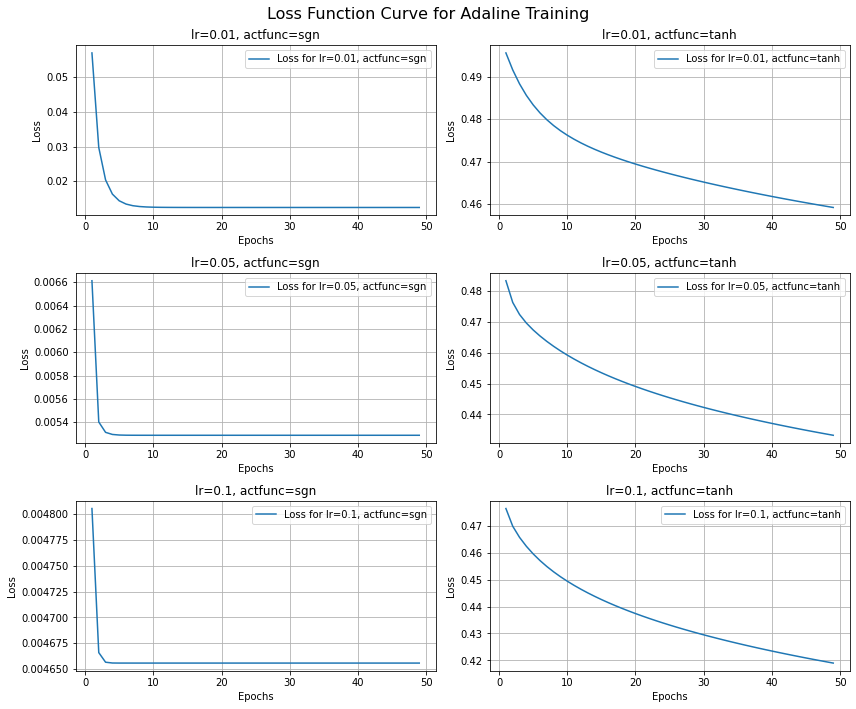

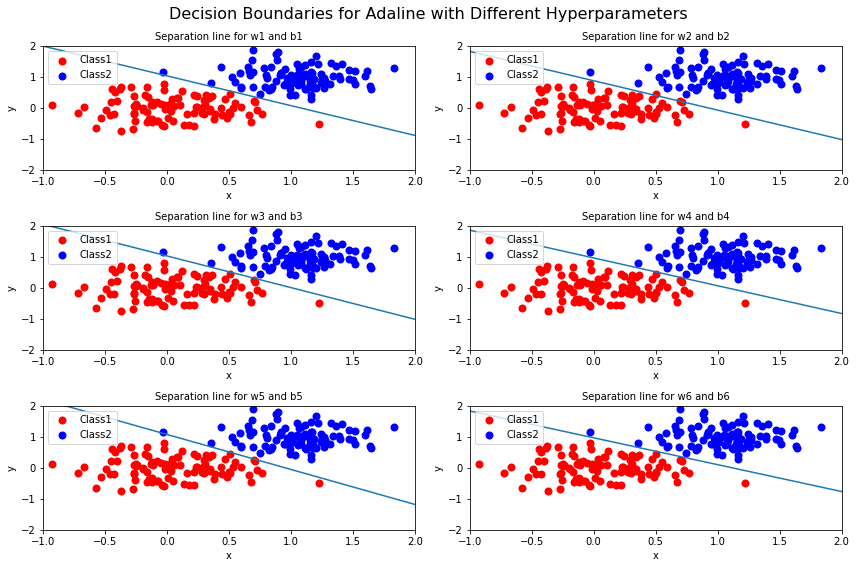

In [ ]:
# define hyperparameters
max_iter = 10000
learning_rates = [0.01, 0.05, 0.1]
actfuncs = ['sgn', 'tanh']

# create subplots
fig, axs = plt.subplots(len(learning_rates), len(actfuncs), figsize=(12, 10))

# set the figure title
fig.suptitle('Loss Function Curve for Adaline Training', fontsize=16)

# define empty lists for weights and biases
weights = []
biases = []

# iterate over hyperparameters and plot the error curves
for i, lr in enumerate(learning_rates):
    for j, actfunc in enumerate(actfuncs):
        w, b, error_lst = Adaline(x, y, max_iter=max_iter, learning_rate=lr, actfunc=actfunc, samples=200)
        itr = range(1, len(error_lst) + 1)
        axs[i, j].plot(itr, error_lst, label='Loss for ' f'lr={lr}, actfunc={actfunc}')

        # add axis labels
        axs[i, j].set_title(f'lr={lr}, actfunc={actfunc}', fontsize=12)
        axs[i, j].set_xlabel('Epochs')
        axs[i, j].set_ylabel('Loss')

        # add grid
        axs[i, j].grid(True)

        # adjust tick label font size
        axs[i, j].tick_params(axis='both', which='major', labelsize=10)

        # add legend
        axs[i, j].legend(loc='upper right')

        # save weights and biases
        weights.append(w)
        biases.append(b)

        # print weights and bias
        print(f'wi: {w}x + {b}')

# adjust subplot spacing
fig.tight_layout()

# save the figure
plt.savefig("Q23figure2.pdf")

# show the plot
plt.show()

# create subplots for decision boundaries
fig2, axs2 = plt.subplots(3, 2, figsize=(12, 8))

# set the figure title
fig2.suptitle('Decision Boundaries for Adaline with Different Hyperparameters', fontsize=16)


# plot the weight and bias separation lines

for i, (w, b) in enumerate(zip(weights, biases)):
    px1, px2 = SeparationLine(-3, 3, w, b)

    plt.subplot(3, 2, i + 1)
    plt.scatter(Class1_x, Class1_y, c="red", linewidths=2)
    plt.scatter(Class2_x, Class2_y, c="blue", linewidths=2)
    plt.plot(px1, px2)

    plt.xlim(-1, 2)
    plt.ylim(-2, 2)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(["Class1", "Class2"], loc='upper left')

    plt.title(f"Separation line for w{i+1} and b{i+1}", fontsize=10)

plt.tight_layout()
plt.savefig("Q23figure3.pdf")
plt.show()

In [ ]:
np.random.seed(100)

In [ ]:
avg_x_1 = 0
sd_x_1 = 0.4
Class1_x = np.random.normal(avg_x_1, sd_x_1, 100)

avg_y_1 = 0
sd_y_1 = 0.4
Class1_y = np.random.normal(avg_y_1, sd_y_1, 100)

Class1_Data = list(zip(Class1_x,Class1_y))
Class1_Label = np.ones(100)
Class1 = list(zip(Class1_Data,Class1_Label))

In [ ]:
avg_x_2 = 1
sd_x_2 = 0.3
Class2_x = np.random.normal(avg_x_2, sd_x_2, 100)

avg_y_2 = 1
sd_y_2 = 0.3
Class2_y = np.random.normal(avg_y_2, sd_y_2, 100)

Class2_Data = list(zip(Class2_x,Class2_y))
Class2_Label = np.zeros(100) - np.ones(100)
Class2 = list(zip(Class2_Data,Class2_Label))

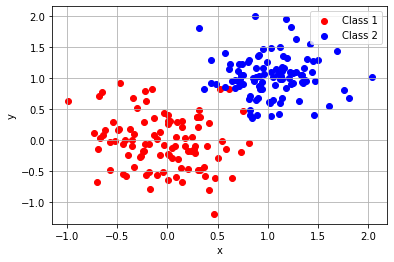

In [ ]:
plt.scatter(Class1_x, Class1_y, c ="red", linewidths = 1)
plt.scatter(Class2_x, Class2_y, c ="blue", linewidths = 1)

plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Class 1" , "Class 2"])
plt.grid(True)  # add grid
plt.savefig("Q231figure1.pdf")
plt.show()

In [ ]:
x, y = PrepareData(Class1,Class2) # Prepare Dataset

In [ ]:
pd.DataFrame(x)

,datapoints
0,"(0.9275953751344046, 0.8245332002620156)"
1,"(1.8127005842097756, 0.681559708923507)"
2,"(-0.1007516556852852, -0.5587997379813134)"
3,"(1.1108833452021205, 0.42057614292128576)"
4,"(1.344237231554197, 0.9339608308696026)"
...,...
195,"(0.24521555267501852, 0.052099382141080876)"
196,"(-0.18321079420104971, -0.5185567228600604)"
197,"(0.479382655800078, 0.899156911456913)"
198,"(1.0529111434465128, 1.027832927490205)"


In [ ]:
pd.DataFrame(y)

,labels
0,-1.0
1,-1.0
2,1.0
3,-1.0
4,-1.0
...,...
195,1.0
196,1.0
197,-1.0
198,-1.0


Initial w=[[0.00543405 0.00278369]], Initial b=[0.]
Hyperparams are:  eps=5e-05, max_iter=10000, learning_rate=0.01, actfunc=sgn, sm=0.01, gamma=0.05
Epoch 1 / 50 - Error: 0.095904
w: [[-0.50885393 -0.47940839]]
b: [0.3052584]
Epoch 2 / 50 - Error: 0.088516
w: [[-0.672027   -0.62479014]]
b: [0.54133951]
Epoch 3 / 50 - Error: 0.084616
w: [[-0.74809408 -0.68782785]]
b: [0.65302485]
Epoch 4 / 50 - Error: 0.082159
w: [[-0.78513675 -0.71522316]]
b: [0.70475988]
Epoch 5 / 50 - Error: 0.080479
w: [[-0.80367543 -0.72661744]]
b: [0.7286884]
Epoch 6 / 50 - Error: 0.079268
w: [[-0.81328768 -0.73093957]]
b: [0.73974854]
Epoch 7 / 50 - Error: 0.078360
w: [[-0.81850003 -0.73223516]]
b: [0.74485581]
Epoch 8 / 50 - Error: 0.077656
w: [[-0.82147745 -0.7323128 ]]
b: [0.74721058]
Epoch 9 / 50 - Error: 0.077097
w: [[-0.82327364 -0.73196222]]
b: [0.7482936]
Epoch 10 / 50 - Error: 0.076642
w: [[-0.82441446 -0.73151377]]
b: [0.7487897]
Epoch 11 / 50 - Error: 0.076265
w: [[-0.82517155 -0.73109434]]
b: [0.7490

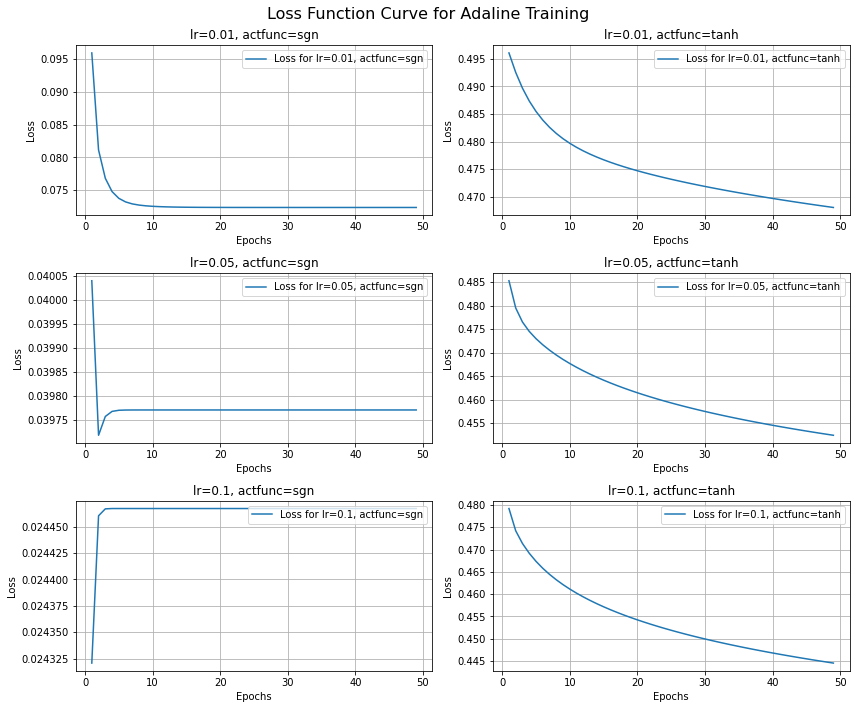

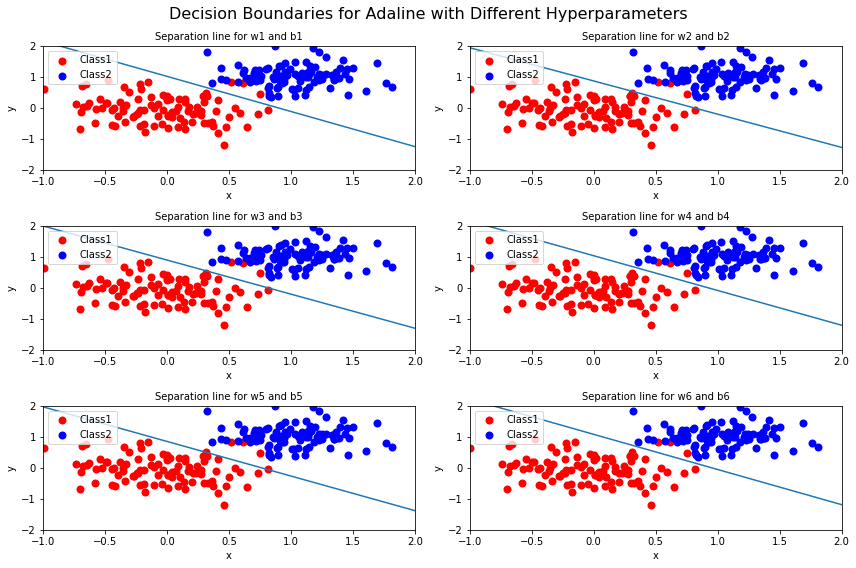

In [ ]:
# define hyperparameters
max_iter = 10000
learning_rates = [0.01, 0.05, 0.1]
actfuncs = ['sgn', 'tanh']

# create subplots
fig, axs = plt.subplots(len(learning_rates), len(actfuncs), figsize=(12, 10))

# set the figure title
fig.suptitle('Loss Function Curve for Adaline Training', fontsize=16)

# define empty lists for weights and biases
weights = []
biases = []

# iterate over hyperparameters and plot the error curves
for i, lr in enumerate(learning_rates):
    for j, actfunc in enumerate(actfuncs):
        w, b, error_lst = Adaline(x, y, max_iter=max_iter, learning_rate=lr, actfunc=actfunc, samples=200)
        itr = range(1, len(error_lst) + 1)
        axs[i, j].plot(itr, error_lst, label='Loss for ' f'lr={lr}, actfunc={actfunc}')

        # add axis labels
        axs[i, j].set_title(f'lr={lr}, actfunc={actfunc}', fontsize=12)
        axs[i, j].set_xlabel('Epochs')
        axs[i, j].set_ylabel('Loss')

        # add grid
        axs[i, j].grid(True)

        # adjust tick label font size
        axs[i, j].tick_params(axis='both', which='major', labelsize=10)

        # add legend
        axs[i, j].legend(loc='upper right')

        # save weights and biases
        weights.append(w)
        biases.append(b)

        # print weights and bias
        print(f'wi: {w}x + {b}')

# adjust subplot spacing
fig.tight_layout()

# save the figure
plt.savefig("Q231figure2.pdf")

# show the plot
plt.show()

# create subplots for decision boundaries
fig2, axs2 = plt.subplots(3, 2, figsize=(12, 8))

# set the figure title
fig2.suptitle('Decision Boundaries for Adaline with Different Hyperparameters', fontsize=16)


# plot the weight and bias separation lines

for i, (w, b) in enumerate(zip(weights, biases)):
    px1, px2 = SeparationLine(-3, 3, w, b)

    plt.subplot(3, 2, i + 1)
    plt.scatter(Class1_x, Class1_y, c="red", linewidths=2)
    plt.scatter(Class2_x, Class2_y, c="blue", linewidths=2)
    plt.plot(px1, px2)

    plt.xlim(-1, 2)
    plt.ylim(-2, 2)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(["Class1", "Class2"], loc='upper left')

    plt.title(f"Separation line for w{i+1} and b{i+1}", fontsize=10)

plt.tight_layout()
plt.savefig("Q231figure3.pdf")
plt.show()